In [1]:
#!pip install epyestim

In [1]:
import pandas as pd
import numpy as np
import epyestim as ep

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
from scipy.stats import gamma, poisson
import epyestim
import epyestim.covid19 as covid19

In [3]:
data1=pd.read_csv("epidemiology.csv")

In [4]:
data1.head()

,date,key,new_confirmed,new_deceased,new_recovered,new_tested,total_confirmed,total_deceased,total_recovered,total_tested
0,2019-10-23,CZ,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
1,2019-10-23,CZ_32,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
2,2019-10-23,CZ_32_325,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
3,2019-12-31,AR,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0
4,2019-12-31,CZ,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN


In [5]:
def missing_values_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column name': df.columns,
                                 'percentage of missing': percent_missing})
    return missing_value_df 

In [6]:
data= data1[['date', 'key', 'new_confirmed']].copy()

# MAPING 

# Finland 

In [7]:
finland=data.loc[data['key'] == "FI"]
#Finland}
missing_values_percentage(finland)

,column name,percentage of missing
date,date,0.0
key,key,0.0
new_confirmed,new_confirmed,0.0


In [8]:
finland['new_confirmed']=finland['new_confirmed'].astype('int64')

C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
fin= finland[['date', 'new_confirmed']].copy()

In [10]:
#fin.columns = ['Date', 'Cases']

In [11]:
fin=fin.dropna() 

In [12]:
from datetime import datetime
for i in fin.index:
    #o=fin.loc[i, "date"]
    #print(o)
    #break
    fin.loc[i, "date"]= datetime.strptime(fin.loc[i, "date"], '%Y-%m-%d')

# Germany

In [13]:
germany=data.loc[data['key'] == "DE"]
#Finland
missing_values_percentage(germany)

,column name,percentage of missing
date,date,0.0
key,key,0.0
new_confirmed,new_confirmed,0.0


In [14]:
germany['new_confirmed']=germany['new_confirmed'].astype('int64')
ger= germany[['date', 'new_confirmed']].copy()
ger=ger.dropna() 
for i in ger.index:
    #o=fin.loc[i, "date"]
    #print(o)
    #break
    ger.loc[i, "date"]= datetime.strptime(ger.loc[i, "date"], '%Y-%m-%d')

C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# France

In [15]:
France=data.loc[data['key'] == "FR"]
#Finland
missing_values_percentage(France)

,column name,percentage of missing
date,date,0.0
key,key,0.0
new_confirmed,new_confirmed,0.0


In [16]:
France['new_confirmed']=France['new_confirmed'].astype('int64')
fr= France[['date', 'new_confirmed']].copy()
fr=fr.dropna() 
for i in fr.index:
    #o=fin.loc[i, "date"]
    #print(o)
    #break
    fr.loc[i, "date"]= datetime.strptime(fr.loc[i, "date"], '%Y-%m-%d')

C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# England

In [17]:
england=data.loc[data['key'] == "GB_ENG"]
#Finland
missing_values_percentage(england)

,column name,percentage of missing
date,date,0.0
key,key,0.0
new_confirmed,new_confirmed,0.0


In [18]:
england['new_confirmed']=england['new_confirmed'].astype('int64')
eng= england[['date', 'new_confirmed']].copy()
eng=eng.dropna() 
for i in eng.index:
    #o=fin.loc[i, "date"]
    #print(o)
    #break
    eng.loc[i, "date"]= datetime.strptime(eng.loc[i, "date"], '%Y-%m-%d')

C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Ignore outlier for the moment 

# Finland 

In [19]:
fin_cases=fin.set_index('date')['new_confirmed']
type(fin_cases)

pandas.core.series.Series

In [20]:
#ch_cases=ch_cases.squeeze()
#type(ch_cases)

In [21]:
example_series_ = fin_cases[:196]
try:
    example_r = covid19.r_covid(example_series_)
    print('Everything worked fine!')
except AssertionError as err:
    print(f'AssertionError: {err}')

Everything worked fine!


In [22]:
len(example_series_)

196

In [23]:
len(example_r)

123

In [24]:
example_series_2 = fin_cases[201:]
try:
    example_r2 = covid19.r_covid(example_series_2)
    print('Everything worked fine!')
except AssertionError as err:
    print(f'AssertionError: {err}')

Everything worked fine!


In [25]:
len(example_series_2)

185

In [26]:
len(example_r2)

170

In [27]:
example_r_FINAL=example_r.append(example_r2)

In [28]:
len(example_r_FINAL)

293

In [29]:
example_r_FINAL.tail()

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
2021-01-06,331.0,1.033065,0.001409,0.961246,1.032617,1.107779
2021-01-07,223.0,1.034316,0.001399,0.962750,1.033871,1.109572
2021-01-08,296.0,1.036010,0.001383,0.963799,1.035549,1.111105
2021-01-09,324.0,1.034487,0.001370,0.963103,1.034048,1.107907
2021-01-10,198.0,1.036861,0.001363,0.965515,1.036423,1.110631


In [30]:
print(len(fin_cases))
print(len(example_r_FINAL))

386
293


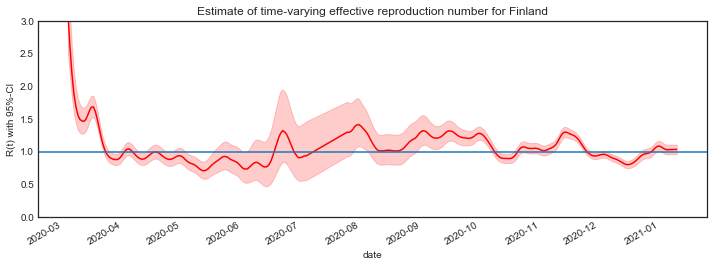

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

example_r_FINAL.loc[:,'Q0.5'].plot(ax=ax, color='red')
ax.fill_between(example_r_FINAL.index, 
                    example_r_FINAL['Q0.025'], 
                    example_r_FINAL['Q0.975'], 
                    color='red', alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('Estimate of time-varying effective reproduction number for Finland')
plt.savefig("R in Finland")
plt.show()

# Germany

In [32]:
ger_cases=ger.set_index('date')['new_confirmed']
#type(ch_cases)
ger_time_varying_r = covid19.r_covid(ger_cases)
ger_time_varying_r.tail()

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
2021-01-03,11897.0,1.063625,0.000019,1.055105,1.063619,1.072178
2021-01-04,21237.0,1.018166,0.000018,1.009973,1.018160,1.026391
2021-01-05,26391.0,0.975002,0.000017,0.967056,0.974996,0.982979
2021-01-06,31849.0,0.928111,0.000016,0.920373,0.928106,0.935882
2021-01-07,24694.0,0.879578,0.000015,0.872026,0.879572,0.887167


In [33]:
print(len(ger_cases))
print(len(ger_time_varying_r))

383
338


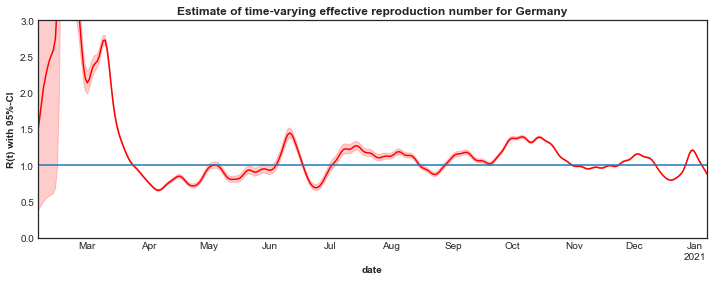

In [41]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

ger_time_varying_r.loc[:,'Q0.5'].plot(ax=ax, color='red')
ax.fill_between(ger_time_varying_r.index, 
                    ger_time_varying_r['Q0.025'], 
                    ger_time_varying_r['Q0.975'], 
                    color='red', alpha=0.2)
ax.set_xlabel('date', fontweight="bold")
ax.set_ylabel('R(t) with 95%-CI', fontweight="bold")
ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('Estimate of time-varying effective reproduction number for Germany', fontweight="bold")
plt.savefig("RinGermany300DPI", dpi=300)

plt.show()

# France

In [36]:
import sys 
fr_cases=fr.set_index('date')['new_confirmed']
#type(ch_cases)
fr_cases.dropna(inplace=True)

In [37]:
#fr_time_varying_r = covid19.r_covid(fr_cases)
#fr_time_varying_r.tail()

In [38]:
example_series_01 = fr_cases[1:119]
try:
    fr_time_varying_r = covid19.r_covid(example_series_01)
    print('Everything worked fine!')
except AssertionError as err:
    print(f'AssertionError: {err}')

Everything worked fine!


In [39]:
example_series_02 = fr_cases[154:]
try:
    fr_time_varying_r = covid19.r_covid(example_series_02)
    print('Everything worked fine!')
except AssertionError as err:
    print(f'AssertionError: {err}')

Everything worked fine!


In [40]:
example_rFRANCE_FINAL=fr_time_varying_r.append(fr_time_varying_r)
example_rFRANCE_FINAL.tail()

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
2021-01-05,20489.0,1.006755,0.000018,0.998561,1.006749,1.014983
2021-01-06,25379.0,0.985519,0.000017,0.977499,0.985513,0.993571
2021-01-07,21703.0,0.989371,0.000017,0.981352,0.989365,0.997414
2021-01-08,19814.0,0.993862,0.000017,0.985794,0.993856,1.001962
2021-01-09,20177.0,0.983346,0.000017,0.975312,0.983341,0.991413


In [41]:
type(example_rFRANCE_FINAL)

pandas.core.frame.DataFrame

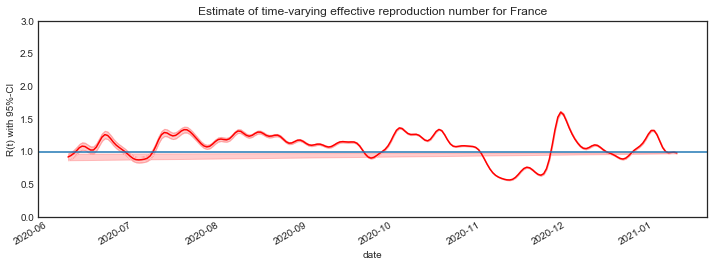

In [42]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

example_rFRANCE_FINAL.loc[:,'Q0.5'].plot(ax=ax, color='red')
ax.fill_between(example_rFRANCE_FINAL.index, 
                    example_rFRANCE_FINAL['Q0.025'], 
                    example_rFRANCE_FINAL['Q0.975'], 
                    color='red', alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('Estimate of time-varying effective reproduction number for France')
plt.savefig("R in France")

plt.show()

# England 

In [43]:
eng_cases=eng.set_index('date')['new_confirmed']
#type(ch_cases)
eng_time_varying_r = covid19.r_covid(eng_cases)
eng_time_varying_r.tail()

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
2021-01-04,69031.0,0.747981,0.000004,0.743856,0.747979,0.752118
2021-01-05,57715.0,0.716527,0.000004,0.712375,0.716525,0.720690
2021-01-06,51147.0,0.685219,0.000005,0.681020,0.685217,0.689431
2021-01-07,46601.0,0.648036,0.000005,0.643795,0.648034,0.652291
2021-01-08,42257.0,0.606636,0.000005,0.602348,0.606633,0.610939


In [44]:
print(len(eng_cases))
print(len(eng_time_varying_r))

355
333


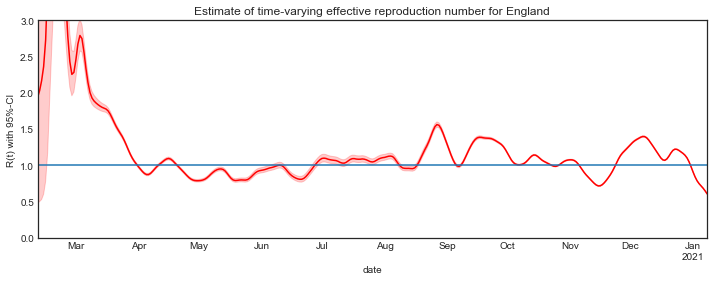

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

eng_time_varying_r.loc[:,'Q0.5'].plot(ax=ax, color='red')
ax.fill_between(eng_time_varying_r.index, 
                    eng_time_varying_r['Q0.025'], 
                    eng_time_varying_r['Q0.975'], 
                    color='red', alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('Estimate of time-varying effective reproduction number for England')
plt.savefig("R in England")
plt.show()

In [46]:
#import sys
#sys.version

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

prepeare the weather 

In [48]:
dataWeather=pd.read_csv("weather.csv")

In [49]:
newWatherDATA= dataWeather[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity' ]].copy()

In [50]:
FinlandWeather =newWatherDATA.loc[newWatherDATA['key'] == "FI"]

In [51]:
FinlandWeather

,date,key,average_temperature,rainfall,relative_humidity
9950,2020-01-01,FI,-3.450000,1.143000,94.427827
31023,2020-01-02,FI,3.211111,0.762000,85.090429
52095,2020-01-03,FI,1.988889,1.342571,82.629384
73163,2020-01-04,FI,-3.377778,1.270000,86.510224
94208,2020-01-05,FI,-8.872222,0.444500,88.163132
...,...,...,...,...,...
8154035,2021-01-22,FI,-12.483333,3.556000,81.978858
8174061,2021-01-23,FI,-9.988889,8.445500,86.730309
8194039,2021-01-24,FI,-2.450000,1.886857,95.967037
8215076,2021-01-25,FI,-2.988889,2.095500,96.141700


In [52]:
Finaland_R=example_r_FINAL

In [54]:
Finaland_R

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
2020-03-04,5.0,3.105562,0.105214,2.515766,3.094397,3.756142
2020-03-05,7.0,2.611179,0.061979,2.150985,2.602974,3.138378
2020-03-06,0.0,2.197665,0.038913,1.830659,2.192076,2.605531
2020-03-07,11.0,1.898963,0.026242,1.590454,1.894156,2.229300
2020-03-08,10.0,1.691023,0.018991,1.429543,1.687072,1.973451
...,...,...,...,...,...,...
2021-01-06,331.0,1.035495,0.001408,0.963073,1.035049,1.109968
2021-01-07,223.0,1.036134,0.001398,0.964149,1.035677,1.111318
2021-01-08,296.0,1.037047,0.001384,0.965227,1.036599,1.111552
2021-01-09,324.0,1.036082,0.001376,0.965357,1.035648,1.109749


In [55]:
Finaland_R.to_csv("FinlandR.csv")
eng_time_varying_r.to_csv('EnglandR.csv')
example_rFRANCE_FINAL.to_csv('France.csv')
ger_time_varying_r.to_csv('Gernamy.csv')